In [1]:
from definiciones import graficar_gini, gini, criterio_equilibrio, gini_barrio, satisfechos_en
from numpy.random import default_rng as random_number_generator
from tp.schelling import mercado_inmobiliario
from tp.util.barrios import Mapa
from tp.util import simulador
import numpy as np
from matplotlib import pyplot as plt


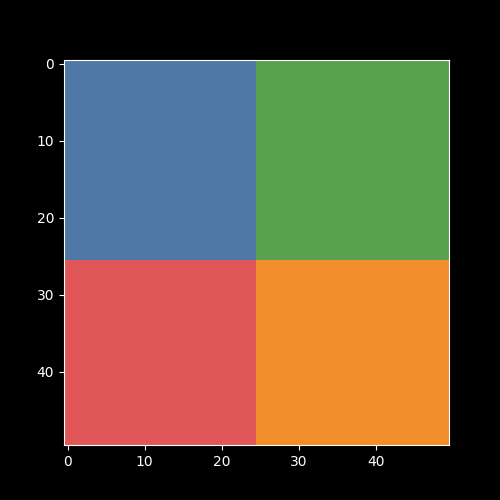

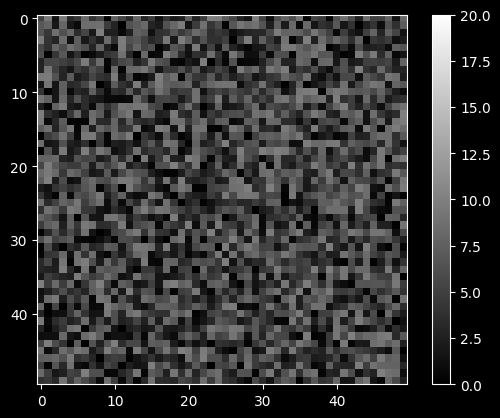

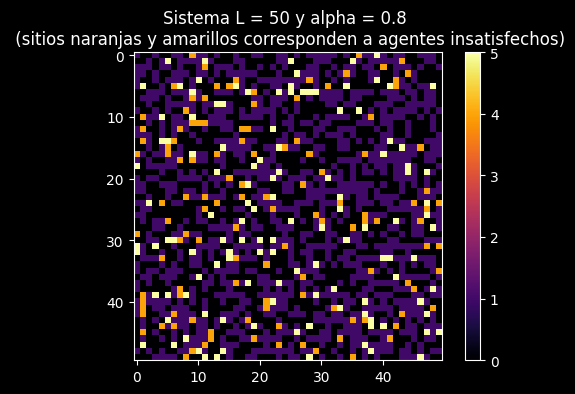

La simulación alcanzó el equilibrio en 478 pasos.


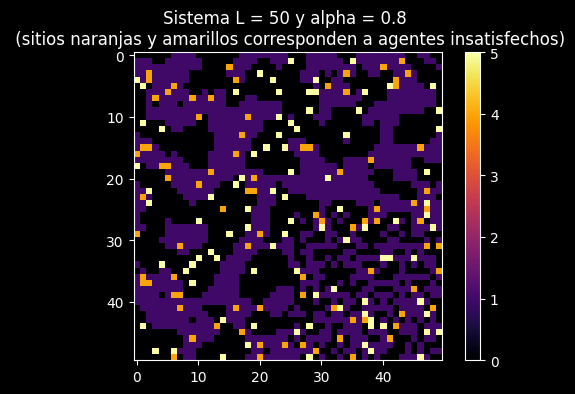

In [25]:
rng = random_number_generator(seed=1)
m = Mapa.load(mapa='./tp/mapas/cuatro_cuadrantes.txt',  barrios_definidos='./tp/barrios.json')
m.as_image();
m.show()


N = 50
start_max = 10
range_max = start_max * 2
config_inicial = rng.uniform(0, start_max, (N, N))
plt.imshow(config_inicial, cmap='grey', norm=plt.Normalize(0, range_max))
plt.colorbar()

modelo = mercado_inmobiliario(
    L=N, 
    alpha=.8,
    rng=rng, 
    mapa = m,
    rango_de_vision=0.15,
    capital_inicial=config_inicial,
)

def gini_total(modelo):
    return gini(modelo.K.flatten())

caching_actions = (
    mercado_inmobiliario.utilidad_media,
    mercado_inmobiliario.capital_medio,
    gini_total,
    *(gini_barrio(x) for x in m.barrios),
    *(satisfechos_en(x) for x in m.barrios),
)

sim = simulador(modelo, criterio_equilibrio, max_steps=int(1e3), lag=20, tol=1e-3, cache_actions=caching_actions)
modelo.lattice_plot()
sim.run()
modelo.lattice_plot()
plt.ion()

In [26]:
plt.ion()

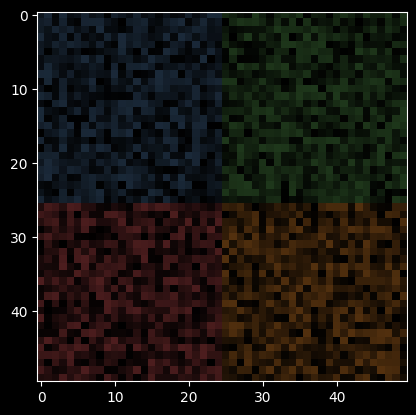

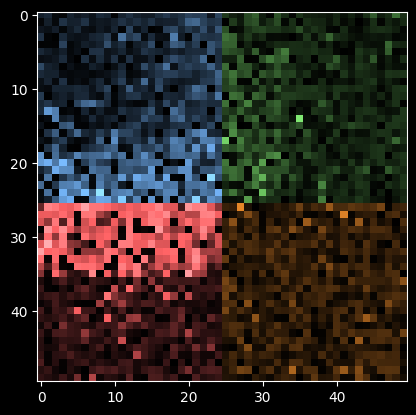

In [27]:
from tp.util.colors import Color
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="Clipping input data to the valid range for imshow with RGB data")

max_val = np.max(modelo.K.flatten())

colors = np.full((50,50,3), 0.0)

for i,j in np.ndindex(50,50):
    colors[i,j] = Color.from_hex(m.barrios_definidos[m.mapa[i,j]].color).as_rgb()
    val = config_inicial[i,j] / max_val*2
    colors[i,j] *= val
    colors[i,j] /= 256.0
    colors = np.clip(colors, 0, 1)

plt.imshow(colors)
plt.show()

colors = np.full((50,50,3), 0.0)

for i,j in np.ndindex(50,50):
    colors[i,j] = Color.from_hex(m.barrios_definidos[m.mapa[i,j]].color).as_rgb()
    val = modelo.K[i,j] / max_val*2
    colors[i,j] *= val
    colors[i,j] /= 256.0
    colors = np.clip(colors, 0, 1)

plt.imshow(colors)
plt.show()

warnings.filterwarnings("default")


In [ ]:
plt.style.use('ggplot')

In [ ]:
fig = plt.figure(figsize=(10, 5))
#for i in range(4):
    #plt.plot(sim._cache[f'gini_barrio_{i}'], label=f'Barrio {i}', color=m.barrios[i].color)

for i in m.barrios:
    plt.plot(sim._cache[f'gini_barrio_{i}'], label=f'Barrio {i}', color=m.barrios_definidos[i].color)

legend = plt.legend()
for t in legend.get_texts():
    t.set_color('black')

In [ ]:
fig = plt.figure(figsize=(10, 5))
# for i in range(4):
#     plt.plot(sim._cache[f'satisfechos_en_{i}'], label=f'Barrio {i}', color=m.barrios[i].color)

for i in m.barrios:
    plt.plot(sim._cache[f'satisfechos_en_{i}'], label=f'Barrio {i}', color=m.barrios_definidos[i].color)

legend = plt.legend()
for t in legend.get_texts():
    t.set_color('black')

In [ ]:
data = modelo.K.flatten()
plot = graficar_gini(data, gini(data))
plot.title('Índice de Gini total inicial', color='black')
plot.show()

In [ ]:
data = config_inicial.flatten()
plot = graficar_gini(data, gini(data))
plot.title('Índice de Gini total final', color='black')
plot.show()